# K-Means Clustering

## Introduction to Clustering

Often, the data you encounter in the real world won’t be sorted into categories and won’t have labeled answers to your question. Finding patterns in this type of data, unlabeled data, is a common theme in many machine learning applications. Unsupervised Learning is how we find patterns and structure in these data.

Clustering is the most well-known unsupervised learning technique. It finds structure in unlabeled data by identifying similar groups, or clusters. Examples of clustering applications are:

- **Recommendation engines**: group products to personalize the user experience
- **Search engines**: group news topics and search results
- **Market segmentation**: group customers based on geography, demography, and behaviors
- **Image segmentation**: medical imaging or road scene segmentation on self-driving cars
- **Text clustering**: group similar texts together based on word usage

The Iris data set is a famous example of unlabeled data. It consists of measurements of sepals and petals on 50 different iris flowers. Here you can see a visualization of this data set that shows how the flowers naturally form three distinct clusters. We’ll learn how to find those clusters in this lesson.

![The image for this exercise will be replaced with a visualization of the iris data set.](https://content.codecademy.com/programs/machine-learning/k-means/k_means_clustering.gif)

Let’s get started!

## K-Means Clustering

The goal of clustering is to separate data so that data similar to one another are in the same group, while data different from one another are in different groups. So two questions arise:

- How many groups do we choose?
- How do we define similarity?

k-means is the most popular and well-known clustering algorithm, and it tries to address these two questions.

The `k` refers to the number of clusters (groups) we expect to find in a dataset.
The `Means` refers to the average distance of data to each cluster center, also known as the centroid, which we are trying to minimize.

It is an iterative approach:

1. Place k random centroids for the initial clusters.
2. Assign data samples to the nearest centroid.
3. Calculate new centroids based on the above-assigned data samples.
4. Repeat Steps 2 and 3 until convergence.

Convergence occurs when points don’t move between clusters and centroids stabilize. This iterative process of updating clusters and centroids is called training.

Once we are happy with our clusters, we can take a new unlabeled datapoint and quickly assign it to the appropriate cluster. This is called inference.

In practice it can be tricky to know how many clusters to look for. In the example here, the algorithm is sorting the data into k=2 clusters.

## Iris Dataset

Before we implement the k-means algorithm, let’s find a dataset. The sklearn package embeds some datasets and sample images. One of them is the Iris dataset.

The Iris dataset consists of measurements of sepals and petals of 3 different plant species:

Iris setosa
Iris versicolor
Iris virginica

![Iris](https://content.codecademy.com/programs/machine-learning/k-means/iris.svg)

The sepal is the part that encases and protects the flower when it is in the bud stage. A petal is a leaflike part that is often colorful.

From sklearn library, import the datasets module:

from sklearn import datasets
To load the Iris dataset:

iris = datasets.load_iris()
The Iris dataset looks like:

[[ 5.1  3.5  1.4  0.2 ]
 [ 4.9  3.   1.4  0.2 ]
 [ 4.7  3.2  1.3  0.2 ]
 [ 4.6  3.1  1.5  0.2 ]
   . . .
 [ 5.9  3.   5.1  1.8 ]]
We call each row of data a sample. For example, each flower is one sample.

Each characteristic we are interested in is a feature. For example, petal length is a feature of this dataset.

The features of the dataset are:

Column 0: Sepal length
Column 1: Sepal width
Column 2: Petal length
Column 3: Petal width
The 3 species of Iris plants are what we are going to cluster later in this lesson.

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
print(iris.data)
print(iris.target)
print(iris.data[0, :], iris.target[0])
print(iris.DESCR)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## Visualize Before K-Means

To get a better sense of the data in the `iris.data` matrix, let’s visualize it!

With Matplotlib, we can create a 2D scatter plot of the Iris dataset using two of its features (sepal length vs. petal length). Of course there are four different features that we could plot, but it’s much easier to visualize only two dimensions.

The sepal length measurements are stored in column 0 of the matrix, and the petal length measurements are stored in column 2 of the matrix.

But how do we get these values?

Suppose we only want to retrieve the values that are in column 0 of a matrix, we can use the NumPy/pandas notation `[:,0]` like so:

```python
matrix[:,0]
```

`[:,0]` can be translated to `[all_rows , column_0]`

Once you have the measurements we need, we can make a scatter plot like this:

```python
plt.scatter(x, y)
```

To show the plot:

```python
plt.show()
```


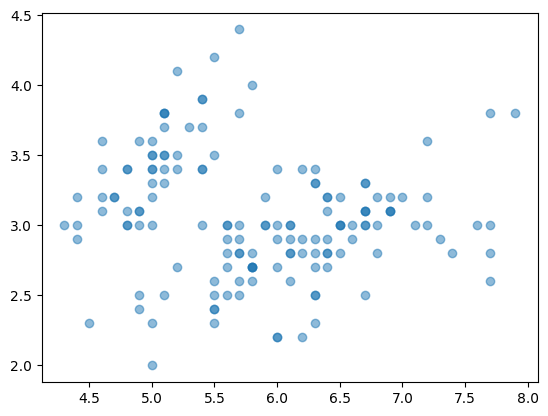

In [4]:
# Store iris.data
samples = iris.data

# Create x and y
x = samples[:,0]
y = samples[:,1]

# Plot x and y
plt.scatter(x, y, alpha=0.5)

# Show the plot
plt.show()


Implementing K-Means: Step 1
The K-Means algorithm:

Place k random centroids for the initial clusters.
Assign data samples to the nearest centroid.
Update centroids based on the above-assigned data samples.
Repeat Steps 2 and 3 until convergence.
After looking at the scatter plot and having a better understanding of the Iris data, let’s start implementing the k-means algorithm.

In this exercise, we will implement Step 1.

Because we expect there to be three clusters (for the three species of flowers), let’s implement k-means where the k is 3. In real-life situations you won’t always know how many clusters to look for. We’ll learn more about how to choose k later.

Using the NumPy library, we will create three random initial centroids and plot them along with our samples.

In [ ]:
iris = datasets.load_iris()

samples = iris.data

x = samples[:,0]
y = samples[:,1]

combined = np.array(list(zip(x, y)))

# Number of clusters
k = 3

# Create x coordinates of k random centroids
centroids_x = np.random.uniform(min(x), max(x), size=k)

# Create y coordinates of k random centroids
centroids_y = np.random.uniform(min(y), max(y), size=k)

# Create centroids array
centroids = np.array(list(zip(centroids_x, centroids_y)))

print(centroids)

# Make a scatter plot of x, y
plt.scatter(x, y, alpha=0.5)

# Make a scatter plot of the centroids
plt.scatter(centroids_x, centroids_y)

# Display plot
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()


Implementing K-Means: Step 2
The k-means algorithm:

Place k random centroids for the initial clusters.
Assign data samples to the nearest centroid.
Update centroids based on the above-assigned data samples.
Repeat Steps 2 and 3 until convergence.
In this exercise, we will implement Step 2.

Now we have the three random centroids. Let’s assign data points to their nearest centroids.

To do this we’re going to use a distance formula to write a distance() function.

There are many different kinds of distance formulas. The one you’re probably most familiar with is called Euclidean distance. To find the Euclidean distance between two points on a 2-d plane, make a right triangle so that the hypotenuse connects the points. The distance between them is the length of the hypotenuse.

Another common distance formula is the taxicab distance. The taxicab distance between two points on a 2-d plane is the distance you would travel if you took the long way around the right triangle via the two shorter sides, just like a taxicab would have to do if it wanted to travel to the opposite corner of a city block.

Different distance formulas are useful in different situations. If you’re curious, you can learn more about various distance formulas here. For this lesson, we’ll use Euclidean distance.

After we write the distance() function, we are going to iterate through our data samples and compute the distance from each data point to each of the 3 centroids.

Suppose we have a point and a list of three distances in distances and it looks like [15, 20, 5], then we would want to assign the data point to the 3rd centroid. The argmin(distances) would return the index of the lowest corresponding distance, 2, because the index 2 contains the minimum value.

In [ ]:
sepal_length_width = np.array(list(zip(x, y)))

# Step 1: Place K random centroids
k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

# Step 2: Assign samples to nearest centroid
# Distance formula
def distance(a, b):
  one = (a[0] - b[0]) ** 2
  two = (a[1] - b[1]) ** 2
  distance = (one+two) ** 0.5
  return distance

# Cluster labels for each point (either 0, 1, or 2)
labels = np.zeros(len(samples))

# A function that assigns the nearest centroid to a sample
def assign_to_centroid(sample, centroids):
  k = len(centroids)
  distances = np.zeros(k)
  for i in range(k):
    distances[i] = distance(sample, centroids[i])
  closest_centroid = np.argmin(distances)
  return closest_centroid

# Assign the nearest centroid to each sample
for i in range(len(samples)):
  labels[i] = assign_to_centroid(samples[i], centroids)

# Print labels
print(labels)

Implementing K-Means: Step 3
The k-means algorithm:

Place k random centroids for the initial clusters.
Assign data samples to the nearest centroid.
Update centroids based on the above-assigned data samples.
Repeat Steps 2 and 3 until convergence.
In this exercise, we will implement Step 3.

Find new cluster centers by taking the average of the assigned points. To find the average of the assigned points, we can use the .mean() function.

In [ ]:
import codecademylib3_seaborn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from copy import deepcopy

iris = datasets.load_iris()

samples = iris.data

x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))

# Step 1: Place K random centroids

k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

# Step 2: Assign samples to nearest centroid

# Distance formula

def distance(a, b):
  one = (a[0] - b[0]) **2
  two = (a[1] - b[1]) **2
  distance = (one+two) ** 0.5
  return distance

# Cluster labels for each point (either 0, 1, or 2)

labels = np.zeros(len(samples))

# A function that assigns the nearest centroid to a sample

def assign_to_centroid(sample, centroids):
  k = len(centroids)
  distances = np.zeros(k)
  for i in range(k):
    distances[i] = distance(sample, centroids[i])
  closest_centroid = np.argmin(distances)
  return closest_centroid

# Assign the nearest centroid to each sample

for i in range(len(samples)):
  labels[i] = assign_to_centroid(samples[i], centroids)

# Step 3: Update centroids

centroids_old = deepcopy(centroids)

for i in range(k):
  points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
  centroids[i] = np.mean(points, axis=0)
  
print(centroids_old)
print("- - - - - - - - - - - - - -")
print(centroids)

Implementing K-Means: Step 4
The k-means algorithm:

Place k random centroids for the initial clusters.
Assign data samples to the nearest centroid.
Update centroids based on the above-assigned data samples.
Repeat Steps 2 and 3 until convergence.
In this exercise, we will implement Step 4.

This is the part of the algorithm where we repeatedly execute Step 2 and 3 until the centroids stabilize (convergence).

We can do this using a while loop. And everything from Step 2 and 3 goes inside the loop.

For the condition of the while loop, we need to create an array named errors. In each error index, we calculate the difference between the updated centroid (centroids) and the old centroid (centroids_old).

The loop ends when all three values in errors are 0.

In [ ]:
import codecademylib3_seaborn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from copy import deepcopy

iris = datasets.load_iris()

samples = iris.data

x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))

# Step 1: Place K random centroids

k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

def distance(a, b):
  one = (a[0] - b[0]) ** 2
  two = (a[1] - b[1]) ** 2
  distance = (one + two) ** 0.5
  return distance

# A function that assigns the nearest centroid to a sample
def assign_to_centroid(sample, centroids):
  k = len(centroids)
  distances = np.zeros(k)
  for i in range(k):
    distances[i] = distance(sample, centroids[i])
  closest_centroid = np.argmin(distances)
  return closest_centroid

# To store the value of centroids when it updates
centroids_old = np.zeros(centroids.shape)

# Cluster labeles (either 0, 1, or 2)
labels = np.zeros(len(samples))

distances = np.zeros(3)

# Initialize error:
error = np.zeros(3)

for i in range(k):
  error[i] = distance(centroids[i], centroids_old[i])

# Repeat Steps 2 and 3 until convergence:

while error.all() != 0:

  # Step 2: Assign samples to nearest centroid

  for i in range(len(samples)):
    labels[i] = assign_to_centroid(samples[i], centroids)

  # Step 3: Update centroids

  centroids_old = deepcopy(centroids)

  for i in range(k):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)
    error[i] = distance(centroids[i], centroids_old[i])

colors = ['r', 'g', 'b']

for i in range(k):
  points = np.array([sepal_length_width[j] for j in range(len(samples)) if labels[j] == i])
  plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()


Implementing K-Means: Scikit-Learn
Awesome, you have implemented k-means clustering from scratch!

Writing an algorithm whenever you need it can be very time-consuming and you might make mistakes and typos along the way. We will now show you how to implement k-means more efficiently – using the scikit-learn library.

There are many advantages to using scikit-learn. It can run k-means on datasets with as many features as your computer can handle, so it will be easy for us to use all four features of the iris data set instead of the two features that we used in the previous exercises.

Another big advantage of scikit-learn is that it is a widely-used open-source library. It is very well-tested, so it is much less likely to contain mistakes. Since so many people use it, there are many online resources that can help you if you get stuck. If you have a specific question about scikit-learn, it’s very likely that other users have already asked and answered your question on public forums.

To import KMeans from sklearn.cluster:

from sklearn.cluster import KMeans
For Step 1, use the KMeans() method to build a model that finds k clusters. To specify the number of clusters (k), use the n_clusters keyword argument:

model = KMeans(n_clusters = k)
For Steps 2 and 3, use the .fit() method to compute k-means clustering:

model.fit(X)
After k-means, we can now predict the closest cluster each sample in X belongs to. Use the .predict() method to compute cluster centers and predict cluster index for each sample:

model.predict(X)

In [ ]:
import codecademylib3_seaborn
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()

samples = iris.data

# Use KMeans() to create a model that finds 3 clusters
model = KMeans(n_clusters=3)

# Use .fit() to fit the model to samples
model.fit(samples)

# Use .predict() to determine the labels of samples 
labels = model.predict(samples)

# Print the labels
print(labels)


New Data?
You used k-means and found three clusters of the samples data. But it gets cooler!

Since you have created a model that computed k-means clustering, you can now feed new data samples into it and obtain the cluster labels using the .predict() method.

So, suppose we went to the florist and bought 3 more Irises with the measurements:

[[ 5.1  3.5  1.4  0.2 ]
 [ 3.4  3.1  1.6  0.3 ]
 [ 4.9  3.   1.4  0.2 ]]
We can feed this new data into the model and obtain the labels for them.

In [ ]:
import codecademylib3_seaborn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()

samples = iris.data

model = KMeans(n_clusters=3)

model.fit(samples)

# Store the new Iris measurements
new_samples = np.array([[5.7, 4.4, 1.5, 0.4],
   [6.5, 3. , 5.5, 0.4],
   [5.8, 2.7, 5.1, 1.9]])

# Predict labels for the new_samples
new_labels = model.predict(new_samples)

print(new_labels)

new_names = [iris.target_names[label] for label in new_labels]

print(new_names)


## Visualize After K-Means

We have done the following using sklearn library:

Load the embedded dataset
Compute k-means on the dataset (where k is 3)
Predict the labels of the data samples
And the labels resulted in either 0, 1, or 2.

Let’s finish it by making a scatter plot of the data again!

This time, however, use the labels numbers as the colors.

To edit colors of the scatter plot, we can set c = labels:

plt.scatter(x, y, c=labels, alpha=0.5)
 
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

In [ ]:
import codecademylib3_seaborn
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()

samples = iris.data

model = KMeans(n_clusters=3)

model.fit(samples)

labels = model.predict(samples)

print(labels)

# Make a scatter plot of x and y and using labels to define the colors
x = samples[:,0]
y = samples[:,1]

plt.scatter(x, y, c=labels, alpha=0.5)
 
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
 
plt.show()

## Evaluation

At this point, we have clustered the Iris data into 3 different groups (implemented using Python and using scikit-learn). But do the clusters correspond to the actual species? Let’s find out!

First, remember that the Iris dataset comes with target values:

target = iris.target
It looks like:

[ 0 0 0 0 0 ... 2 2 2]
According to the metadata:

All the 0‘s are Iris-setosa
All the 1‘s are Iris-versicolor
All the 2‘s are Iris-virginica
Let’s change these values into the corresponding species using the following code:

species = [iris.target_names[t] for t in list(target)]
Then we are going to use the Pandas library to perform a cross-tabulation.

Cross-tabulations enable you to examine relationships within the data that might not be readily apparent when analyzing total survey responses.

The result should look something like:

labels    setosa    versicolor    virginica
0             50             0            0
1              0             2           36
2              0            48           14
(You might need to expand this narrative panel in order to the read the table better.)

The first column has the cluster labels. The second to fourth columns have the Iris species that are clustered into each of the labels.

By looking at this, you can conclude that:

Iris-setosa was clustered with 100% accuracy.
Iris-versicolor was clustered with 96% accuracy.
Iris-virginica didn’t do so well.
Follow the instructions below to learn how to do a cross-tabulation.

In [ ]:
import codecademylib3_seaborn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd

iris = datasets.load_iris()

samples = iris.data

target = iris.target

model = KMeans(n_clusters=3)

model.fit(samples)

labels = [iris.target_names[s] for s in model.predict(samples)]

# Code starts here:
species = [iris.target_names[t] for t in list(target)]

df = pd.DataFrame({'labels': labels, 'species': species})
 
print(df)

ct = pd.crosstab(df['labels'], df['species'])
print(ct)

## The Number of Clusters

At this point, we have grouped the Iris plants into 3 clusters. But suppose we didn’t know there are three species of Iris in the dataset, what is the best number of clusters? And how do we determine that?

Before we answer that, we need to define what is a good cluster?

Good clustering results in tight clusters, meaning that the samples in each cluster are bunched together. How spread out the clusters are is measured by inertia. Inertia is the distance from each sample to the centroid of its cluster. The lower the inertia is, the better our model has done.

You can check the inertia of a model by:

```python
print(model.inertia_)
```

For the Iris dataset, if we graph all the ks (number of clusters) with their inertias:

![Optimal Number of Clusters](https://content.codecademy.com/programs/machine-learning/k-means/number-of-clusters.svg)

Notice how the graph keeps decreasing.

Ultimately, this will always be a trade-off. If the inertia is too large, then the clusters probably aren’t clumped close together. On the other hand, if there are too many clusters, the individual clusters might not be different enough from each other. The goal is to have low inertia and a small number of clusters.

One of the ways to interpret this graph is to use the elbow method: choose an “elbow” in the inertia plot - when inertia begins to decrease more slowly.

In the graph above, 3 is the optimal number of clusters.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()

samples = iris.data

# Code Start here:
num_clusters = [1,2,3,4,5,6,7,8,]
inertias = []

for i in num_clusters:
  model = KMeans(n_clusters = i)
  model.fit(samples)
  inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
 
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
 
plt.show()


Try It On Your Own
Now it is your turn!

In this review section, find another dataset from one of the following:

The scikit-learn library
UCI Machine Learning Repo
Codecademy GitHub Repo (coming soon!)
Import the pandas library as pd:

import pandas as pd
Load in the data with read_csv():

digits = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)
Note that if you download the data like this, the data is already split up into a training and a test set, indicated by the extensions .tra and .tes. You’ll need to load in both files.

With the command above, you only load in the training set.

Happy Coding!

Instructions
Implement k-means clustering on another dataset and see what you can find. Here are some questions to get you started.

How does the model perform?
How did you choose the number of clusters?
If you think you found something interesting, let us know by posting it on Facebook, Twitter, or Instagram.

In [ ]:
import codecademylib3_seaborn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

samples = iris.data

x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))

# Step 1: Place K random centroids

k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

# Step 2: Assign samples to nearest centroid
# Distance formula
def distance(a, b):
  one = (a[0] - b[0]) ** 2
  two = (a[1] - b[1]) ** 2
  distance = (one+two) ** 0.5
  return distance

# Cluster labels for each point (either 0, 1, or 2)
labels = np.zeros(len(samples))

# A function that assigns the nearest centroid to a sample
def assign_to_centroid(sample, centroids):
  k = len(centroids)
  distances = np.zeros(k)
  for i in range(k):
    distances[i] = distance(sample, centroids[i])
  closest_centroid = np.argmin(distances)
  return closest_centroid

# Assign the nearest centroid to each sample
for i in range(len(samples)):
  labels[i] = assign_to_centroid(samples[i], centroids)

# Print labels
print(labels)